<a href="https://colab.research.google.com/github/LZatTD/sankey/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!nvidia-smi

Thu Dec 17 15:46:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    29W /  70W |   4101MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! [ -e /content ] && pip install -Uqq fastbook

     |████████████████████████████████| 727kB 8.7MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 1.1MB 20.4MB/s 


In [15]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(1)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.246671,0.022755,0.008119,00:47
1,0.078016,0.015667,0.005413,00:47
2,0.037896,0.015083,0.005413,00:47
3,0.027033,0.014198,0.003383,00:47
4,0.018897,0.013462,0.004060,00:47


In [17]:
img = PILImage.create('cat.jpeg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999678


In [20]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [23]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(16)

epoch,train_loss,valid_loss,time
0,3.063642,2.353030,00:01


epoch,train_loss,valid_loss,time
0,1.812181,1.672926,00:01
1,1.600690,1.336084,00:01
2,1.432269,1.112281,00:01
3,1.365767,1.129191,00:01
4,1.294821,1.100798,00:01
5,1.217923,0.913647,00:01
6,1.114822,0.947208,00:01
7,1.027309,0.772171,00:01
8,0.943839,0.766972,00:01
9,0.874115,0.718016,00:01


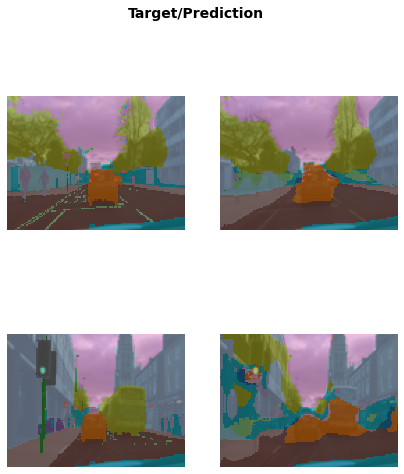

In [24]:
learn.show_results(max_n=6, figsize=(7,8))

In [25]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.604836,0.396903,0.822360,03:50


epoch,train_loss,valid_loss,accuracy,time
0,0.321227,0.256223,0.895480,07:30
1,0.247310,0.200899,0.922400,07:31
2,0.198327,0.182129,0.930520,07:31
3,0.158167,0.184253,0.931640,07:31


In [26]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([4.4009e-04, 9.9956e-01]))